In [1]:
#  import main packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path

# define variables
immo_vis_dir = "../../data/immo_vis/"
parquet_extension = ".parquet"
csv_extension = ".csv"
metropole_appartement_file = "ventes-metropole-appartement" + parquet_extension
metropole_maison_file = "ventes-metropole-maison" + parquet_extension
metropole_appartement_file_cleaned = metropole_appartement_file + "_step1_clean_" + parquet_extension

metropole_appartement_code_iris = 'appartement_prix_groupedby_codeiris' + csv_extension

#  Set plot options
LargePlotActive = False
MediumPlotActive = False
SmallPlotActive = False
HeatMapDisplay = False



# # functions

In [2]:
# functions  

import time

def print_numerical_isna(df) :
    columns = df.select_dtypes(include='number').columns.tolist()
    print (df[columns].isna().sum())

def print_categorial_isna(df) :
    columns = df.select_dtypes(include='category').columns.tolist()
    print (df[columns].isna().sum())     

def load_appartement_file (filename) :
    start_path = Path(immo_vis_dir)
    final_path = start_path / filename
    return pd.read_parquet(final_path.as_posix())

def save_appartement_file (df, filename) :
    start_path = Path(immo_vis_dir)
    final_path = start_path / filename
    df.to_parquet(path=final_path.as_posix(),index=True)

def get_numerical_column_names (df) :
    return [ column for column  in df.columns if df[column].dtype not in ["object","category"]]


def apply_preprocessing  (df) :
    y_tmp =df['prix_bien']
    X_tmp =df.drop(columns=['prix_m2_vente','prix_bien','mapCoordonneesLatitude','mapCoordonneesLongitude','date',"expo_double"])
    return X_tmp,y_tmp



# # decode file and display infos

In [3]:
# import appartement file

df = load_appartement_file(metropole_appartement_file)
nb_rows= df.shape[0]
nb_cols= df.shape[1]

In [4]:
#  print main infos on appartmeent file

print ( f" {metropole_appartement_file} rows {nb_rows} columns {nb_cols}")
print (df.info())



 ventes-metropole-appartement.parquet rows 2092723 columns 59
<class 'pandas.core.frame.DataFrame'>
Index: 2092723 entries, 1 to 4869118
Data columns (total 59 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   idannonce                object 
 1   type_annonceur           object 
 2   typedebien               object 
 3   typedetransaction        object 
 4   etage                    int64  
 5   surface                  int64  
 6   surface_terrain          float64
 7   nb_pieces                int64  
 8   prix_bien                int64  
 9   prix_maison              float64
 10  prix_terrain             float64
 11  mensualiteFinance        int64  
 12  balcon                   int64  
 13  eau                      int64  
 14  bain                     int64  
 15  dpeL                     object 
 16  dpeC                     float64
 17  mapCoordonneesLatitude   float64
 18  mapCoordonneesLongitude  float64
 19  annonce_exclusive        ob

# Analys Iris Code


CODE_IRIS
340030201    5250
660170000    2623
60882203     2358
341721804    2206
60290117     2086
             ... 
590080103       1
595991302       1
593500602       1
591310102       1
593700000       1
Name: count, Length: 24288, dtype: int64
IRIS code numbers 24288
IRIS isna 0
quantile prix_m2_vente appartement 
 0.10     1859.380
0.25     2781.250
0.50     4076.920
0.75     5867.740
0.90     8857.140
0.95    11057.679
0.99    15142.860
Name: prix_m2_vente, dtype: float64


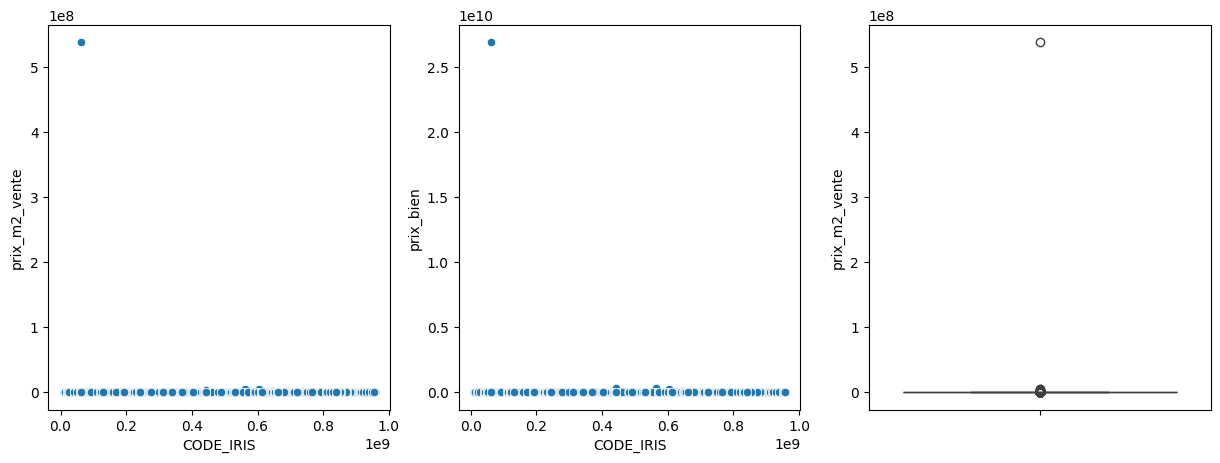

In [5]:
# check dtypes
import seaborn as sns
import matplotlib.pyplot as plt
print (df.CODE_IRIS.value_counts(dropna=False))
print ("IRIS code numbers", len(df.CODE_IRIS.unique()))

print ("IRIS isna", df.CODE_IRIS.isna().sum())

print("quantile prix_m2_vente appartement \n",df["prix_m2_vente"].quantile([.1, .25, .5, .75, .90,.95,.99]))

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.scatterplot(ax=axes[0],x=df.CODE_IRIS,y=df.prix_m2_vente)
sns.scatterplot(ax=axes[1],x=df.CODE_IRIS,y=df.prix_bien)
sns.boxplot(ax=axes[2],y=df.prix_m2_vente)

plt.show()

In [6]:
results = df.groupby(["CODE_IRIS"]).agg(
prix_bien_median=("prix_bien","median"),
prix_bien_moyen=("prix_bien","mean"),
prix_m2_vente_median=("prix_m2_vente","median"),
prix_m2_vente_moyen=("prix_m2_vente","mean")
).sort_values(by="prix_m2_vente_moyen", ascending=False)

start_path = Path(immo_vis_dir)
final_path = start_path / metropole_appartement_code_iris

print (results)

results.reset_index().to_csv(final_path.as_posix())

df1 = pd.read_csv(final_path.as_posix())

display(df1.head(10))



           prix_bien_median  prix_bien_moyen  prix_m2_vente_median  \
CODE_IRIS                                                            
930450108          400000.0     4.631551e+05              7957.695   
60880204           300000.0     8.469128e+07              5957.450   
441900109          270000.0     1.100349e+07              4349.210   
582850000          147500.0     1.475000e+05             73750.000   
603460201          262750.0     3.330339e+06              4281.305   
...                     ...              ...                   ...   
450450000             570.0     5.700000e+02                 9.050   
451100000             550.0     5.500000e+02                 8.730   
807670000             720.0     7.200000e+02                 7.830   
812630000             566.0     5.660000e+02                 7.350   
691090000             416.0     4.160000e+02                 7.050   

           prix_m2_vente_moyen  
CODE_IRIS                       
930450108              

,Unnamed: 0,CODE_IRIS,prix_bien_median,prix_bien_moyen,prix_m2_vente_median,prix_m2_vente_moyen
0,0,930450108,400000.0,4.631551e+05,7957.695,inf
1,1,60880204,300000.0,8.469128e+07,5957.450,1.692857e+06
2,2,441900109,270000.0,1.100349e+07,4349.210,1.492023e+05
3,3,582850000,147500.0,1.475000e+05,73750.000,7.375000e+04
4,4,603460201,262750.0,3.330339e+06,4281.305,5.906799e+04
5,5,704590000,3250000.0,3.250000e+06,52419.350,5.241935e+04
6,6,303540000,101000.0,1.010000e+05,50500.000,5.050000e+04
7,7,561350000,1650000.0,1.825000e+06,43421.050,3.339835e+04
8,8,593410000,85500.0,8.550000e+04,28500.000,2.850000e+04
9,9,562600116,198000.0,1.774830e+06,4157.890,2.366829e+04


# # Preprocessing